In [31]:
!pip install xgboost
!pip install shap
!pip install eli5
!pip install lime
!pip install sklearn
!pip install pdpbox

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 106 kB 24.2 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 275 kB 19.7 MB/s 
     |████████████████████████████████| 29.2 MB 584 kB/s 
     |████████████████████████████████| 178 kB 44.3 MB/s 
     |████████████████████████████████| 3.3 MB 34.2 MB/s 
     |████████████████████████████████| 6.1 MB 36.6 MB/s 
     |████████████████████████████████| 1.9 MB 31.7 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283845 sha256=1e08cfbea7f15601be45e29ed7b9c3ddeafd7b07ee6493e25b109597deff63a7
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
You should con

In [32]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
df = pd.read_csv("standardised_data.csv")
df.head(5)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1.0,0.0,0.001508,0.090287,0.090032,0.077441,0.256321,0.888663,0.045086,0.852140,...,0.5,0.0,1.0,1.000000,1.000000,1.00,0.75,0.2,1.000000,0.087719
1,0.0,0.0,0.002085,0.311736,0.132924,0.271605,0.045016,0.476287,0.043648,0.951929,...,0.0,0.0,0.0,0.166667,0.571429,0.25,0.25,0.2,0.166667,0.684211
2,0.0,0.0,0.000354,0.022472,0.020025,0.023569,0.134897,0.347505,0.046161,0.827335,...,0.5,1.0,1.0,1.000000,1.000000,1.00,0.75,0.2,0.166667,0.192982
3,0.0,0.0,0.000816,0.116854,0.078975,0.117845,0.392880,0.297482,0.038820,0.825268,...,0.5,0.0,1.0,1.000000,1.000000,1.00,0.75,0.2,0.666667,0.649123
4,0.0,0.0,0.000623,0.111235,0.101018,0.103255,0.491595,0.466350,0.042604,0.798557,...,0.5,0.0,1.0,0.833333,0.571429,1.00,0.25,0.2,1.000000,0.578947


We will train 3 model and choose the best at the end. 

Our models : Xgboost, Random Forest & Gradient Boosting 

In [34]:
y = df[['TARGET']]
X = df.drop('TARGET', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [35]:
def model_accuracy (X_test :pd.DataFrame, y_test :pd.DataFrame, model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy: ",(accuracy * 100.0))

In [36]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
model_accuracy(X_test,y_test,model_XGB)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
[16:20:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[48483    74]
 [ 4064    64]]
Accuracy:  92.14577204137801


In [ ]:
model_RFC=RandomForestClassifier(n_estimators=100)
model_RFC.fit(X_train,y_train)
model_accuracy(X_test,y_test,model_RFC)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[[48554     3]
 [ 4126     2]]
Accuracy:  92.16285470247698


In [ ]:
model_GBC=GradientBoostingClassifier(n_estimators=100)
model_GBC.fit(X_train,y_train)
model_accuracy(X_test,y_test,model_GBC)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[[48548     9]
 [ 4113    15]]
Accuracy:  92.17614121666509


In [ ]:
model_XGB.save_model('XGBOOST.model')

Permutation explainer: 101it [00:18,  2.57it/s]


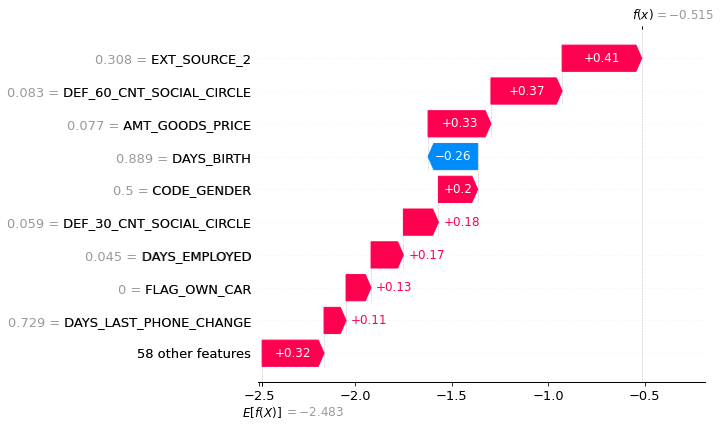

In [62]:
import shap
shap.initjs()

background = shap.maskers.Independent(X)
def f(x):
    return shap.links.identity(model_XGB.predict_proba(x, validate_features=False)[:,1])
explainer = shap.Explainer(f, background, link=shap.links.logit)
shap_values = explainer(X[:100])

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

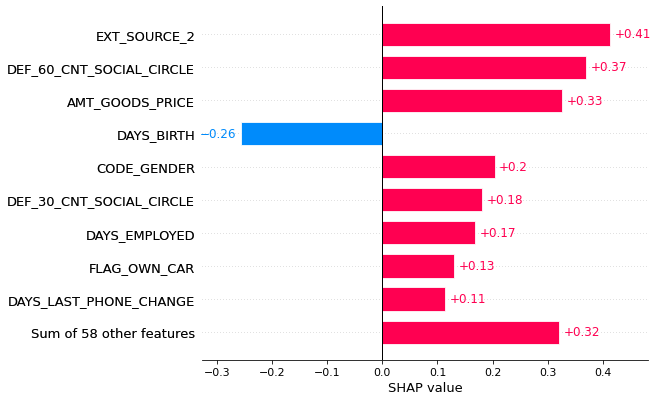

In [63]:
shap.plots.bar(shap_values[0])

In [64]:
shap.initjs()
shap.plots.force(shap_values[0])


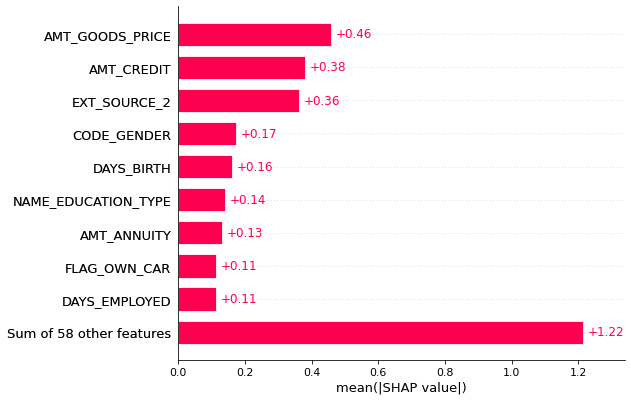

In [65]:
shap.plots.bar(shap_values)

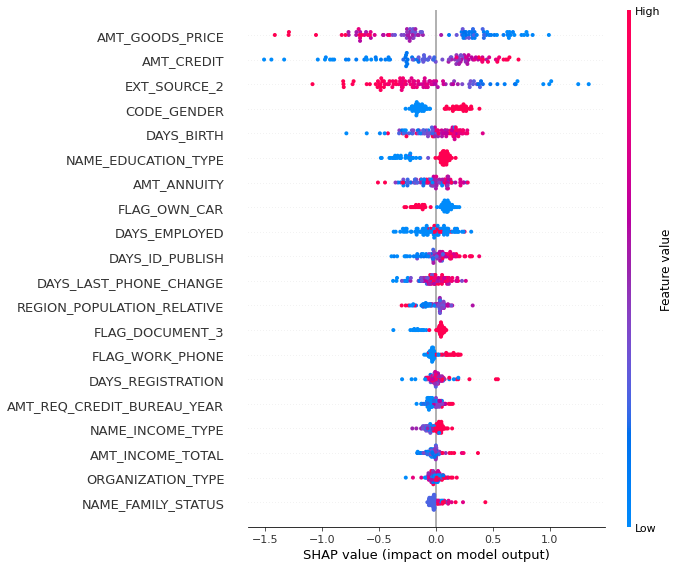

In [66]:
shap.summary_plot(shap_values)

In [72]:
# shap.dependence_plot("AMT_CREDIT", shap_values, X)


In [73]:
explainer = shap.TreeExplainer(model_XGB)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


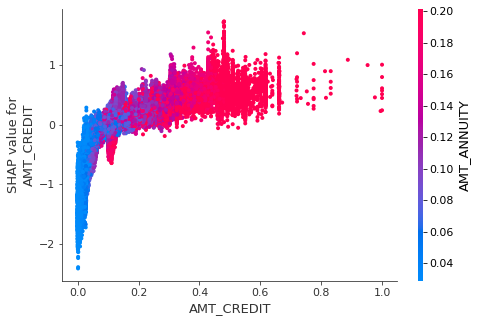

In [78]:
shap.dependence_plot("AMT_CREDIT", shap_values, X)


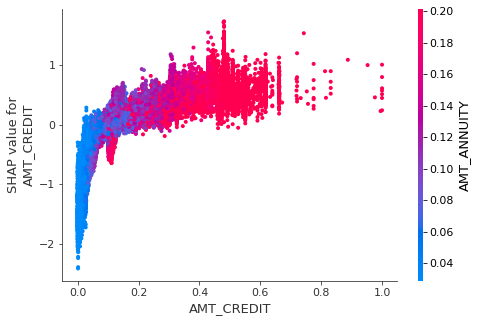

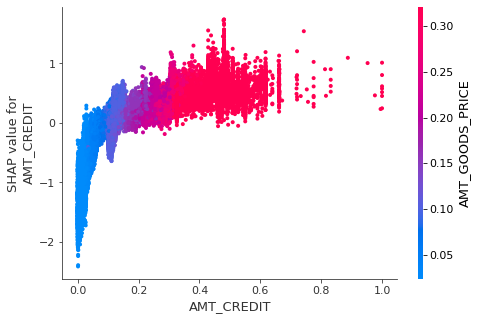

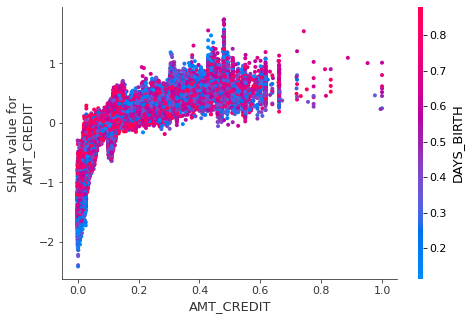

In [80]:
inds = shap.approximate_interactions("AMT_CREDIT", shap_values, X)

for i in range(3):
    shap.dependence_plot("AMT_CREDIT", shap_values, X, interaction_index=inds[i])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5e2ef48b-7703-4677-a8b9-64913d9e5bbb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>